# Starting off:

### In machine learning what is the difference between an  algorithm and a model?







# Reducing Loss with Gradient Descent





Agenda:

- Logic of Gradient Descent
- Determining the Gradient
- Learning Rate
- Quick Practice
- Batches, Epochs and Iterations
- Google Playground

The goal of fitting a model is to minimize our cost function, also referred to as loss.

Earlier we showed how you can use linear algebra to determine the coefficients that would minimize loss for a linear regression model. This is not possible with all models or data sets.  



Imagine you are trying to fit a linear regression model to predict housing prices. The only probelm is that you have millions of observations and all of your data won't fit in memory.

We learned this morning that linear regression can use the closed-form equation to solve for the coefficients, but how do we solve it when you can't fit all of the data in the matrix?

### Introducing gradient descent



## Marco Polo

Think of **gradient descent** as a game of Marco Polo: 
- You pick a starting point for your weights, then you call out to the data and it gives you some feedback (loss). 
- After you get that feedback you update your position and get more feedback.
- You repeat this process until you get as close as possible.

<img src='./resources/GradientDescentDiagram.svg' width=500 />

### How do we 'compute parameter updates' 

Suppose we had the time and the computing resources to calculate the loss for all possible values of the coefficients. The resulting plot of weights and total loss will always be convex. In other words, the plot will always be bowl-shaped, kind of like this:


<img src='./resources/convex.svg' width=500 />

The **gradient descent algorithm** then calculates the gradient of the loss curve at the starting point. 

The gradient of loss is equal to the derivative (slope) of the curve, and tells you which way is "warmer" or "colder." 

<img src='./resources/GradientDescentNegativeGradient.svg' width=500 />

When there are multiple weights, the gradient is a vector of partial derivatives with respect to the weights.

Since gradient is a vector, so it has both of the following characteristics:

- a direction
- a magnitude

Here is the idea of gradient descent in multiple deminsions. 

<img src='./resources/hilldescent.png' width=500 />



### Partial Derivatives of the cost function

<img src='./resources/gdformula.png' width=500 />



### Gradient vector of the cost function

<img src='./resources/vectorofpartialderivative.png' width=500 />


We understand which direction we want to take a step in, but how big of a step should we take?

<img src='./resources/GradientDescentGradientStep.svg' width=500 />


## Learning Rate

Gradient descent algorithms multiply the gradient by a scalar known as the learning rate (also sometimes called step size) to determine the next point. For example, if the gradient magnitude is 2.5 and the learning rate is 0.01, then the gradient descent algorithm will pick the next point 0.025 away from the previous point.

The size of the step is a ***hyperparameter*** that we can choose. 


### Too Small
<img src='./resources/LearningRateTooSmall.svg' width=500 />


### Too Big

<img src='./resources/LearningRateTooLarge.svg' width=500 />


### Just Right

<img src='./resources/LearningRateJustRight.svg' width=500 />


### What is the appropriate learning rate?

The ideal learning rate in one-dimension is  (the inverse of the second derivative of f(x) at x).

The ideal learning rate for 2 or more dimensions is the inverse of the Hessian (matrix of second partial derivatives).

The story for general convex functions is more complex.

#### It is complex to figure out, so let's just try multiple ones and see which one works best.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [2]:
def gradientDescent(x, y, theta, alpha, m, numEpochs):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numEpochs):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        costs.append(cost)
#         print(theta)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y = costs, x = [i for i in range(len(costs))])
    return costs

In [3]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

In [4]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 50)
m, n = np.shape(x)

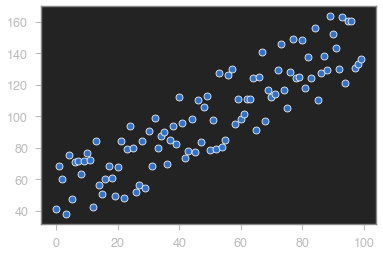

In [5]:
sns.scatterplot(x=x[:,1], y=y)

Iteration 0 | Cost: 461.651905
Iteration 1 | Cost: 458.585585
Iteration 2 | Cost: 455.691916
Iteration 3 | Cost: 452.960879
Iteration 4 | Cost: 450.383037
Iteration 5 | Cost: 447.949501
Iteration 6 | Cost: 445.651897
Iteration 7 | Cost: 443.482338
Iteration 8 | Cost: 441.433393
Iteration 9 | Cost: 439.498066
Iteration 10 | Cost: 437.669762
Iteration 11 | Cost: 435.942273
Iteration 12 | Cost: 434.309749
Iteration 13 | Cost: 432.766680
Iteration 14 | Cost: 431.307876
Iteration 15 | Cost: 429.928449
Iteration 16 | Cost: 428.623792
Iteration 17 | Cost: 427.389569
Iteration 18 | Cost: 426.221692
Iteration 19 | Cost: 425.116314
Iteration 20 | Cost: 424.069808
Iteration 21 | Cost: 423.078759
Iteration 22 | Cost: 422.139951
Iteration 23 | Cost: 421.250353
Iteration 24 | Cost: 420.407111
Iteration 25 | Cost: 419.607535
Iteration 26 | Cost: 418.849094
Iteration 27 | Cost: 418.129401
Iteration 28 | Cost: 417.446209
Iteration 29 | Cost: 416.797402
Iteration 30 | Cost: 416.180986
Iteration 31 | Cos

Iteration 1455 | Cost: 302.283982
Iteration 1456 | Cost: 302.224931
Iteration 1457 | Cost: 302.165898
Iteration 1458 | Cost: 302.106883
Iteration 1459 | Cost: 302.047886
Iteration 1460 | Cost: 301.988907
Iteration 1461 | Cost: 301.929946
Iteration 1462 | Cost: 301.871003
Iteration 1463 | Cost: 301.812078
Iteration 1464 | Cost: 301.753170
Iteration 1465 | Cost: 301.694281
Iteration 1466 | Cost: 301.635410
Iteration 1467 | Cost: 301.576556
Iteration 1468 | Cost: 301.517720
Iteration 1469 | Cost: 301.458903
Iteration 1470 | Cost: 301.400103
Iteration 1471 | Cost: 301.341321
Iteration 1472 | Cost: 301.282557
Iteration 1473 | Cost: 301.223811
Iteration 1474 | Cost: 301.165083
Iteration 1475 | Cost: 301.106373
Iteration 1476 | Cost: 301.047680
Iteration 1477 | Cost: 300.989006
Iteration 1478 | Cost: 300.930349
Iteration 1479 | Cost: 300.871710
Iteration 1480 | Cost: 300.813089
Iteration 1481 | Cost: 300.754486
Iteration 1482 | Cost: 300.695901
Iteration 1483 | Cost: 300.637333
Iteration 1484

Iteration 2902 | Cost: 233.164890
Iteration 2903 | Cost: 233.126881
Iteration 2904 | Cost: 233.088884
Iteration 2905 | Cost: 233.050898
Iteration 2906 | Cost: 233.012924
Iteration 2907 | Cost: 232.974961
Iteration 2908 | Cost: 232.937010
Iteration 2909 | Cost: 232.899070
Iteration 2910 | Cost: 232.861142
Iteration 2911 | Cost: 232.823226
Iteration 2912 | Cost: 232.785321
Iteration 2913 | Cost: 232.747427
Iteration 2914 | Cost: 232.709545
Iteration 2915 | Cost: 232.671675
Iteration 2916 | Cost: 232.633816
Iteration 2917 | Cost: 232.595969
Iteration 2918 | Cost: 232.558133
Iteration 2919 | Cost: 232.520309
Iteration 2920 | Cost: 232.482496
Iteration 2921 | Cost: 232.444695
Iteration 2922 | Cost: 232.406905
Iteration 2923 | Cost: 232.369127
Iteration 2924 | Cost: 232.331360
Iteration 2925 | Cost: 232.293605
Iteration 2926 | Cost: 232.255861
Iteration 2927 | Cost: 232.218129
Iteration 2928 | Cost: 232.180408
Iteration 2929 | Cost: 232.142699
Iteration 2930 | Cost: 232.105001
Iteration 2931

Iteration 3954 | Cost: 198.945769
Iteration 3955 | Cost: 198.918177
Iteration 3956 | Cost: 198.890594
Iteration 3957 | Cost: 198.863019
Iteration 3958 | Cost: 198.835452
Iteration 3959 | Cost: 198.807894
Iteration 3960 | Cost: 198.780345
Iteration 3961 | Cost: 198.752803
Iteration 3962 | Cost: 198.725270
Iteration 3963 | Cost: 198.697746
Iteration 3964 | Cost: 198.670230
Iteration 3965 | Cost: 198.642722
Iteration 3966 | Cost: 198.615222
Iteration 3967 | Cost: 198.587731
Iteration 3968 | Cost: 198.560249
Iteration 3969 | Cost: 198.532775
Iteration 3970 | Cost: 198.505309
Iteration 3971 | Cost: 198.477851
Iteration 3972 | Cost: 198.450402
Iteration 3973 | Cost: 198.422961
Iteration 3974 | Cost: 198.395528
Iteration 3975 | Cost: 198.368104
Iteration 3976 | Cost: 198.340689
Iteration 3977 | Cost: 198.313281
Iteration 3978 | Cost: 198.285882
Iteration 3979 | Cost: 198.258491
Iteration 3980 | Cost: 198.231109
Iteration 3981 | Cost: 198.203735
Iteration 3982 | Cost: 198.176369
Iteration 3983

Iteration 5453 | Cost: 165.733374
Iteration 5454 | Cost: 165.715893
Iteration 5455 | Cost: 165.698418
Iteration 5456 | Cost: 165.680948
Iteration 5457 | Cost: 165.663483
Iteration 5458 | Cost: 165.646023
Iteration 5459 | Cost: 165.628569
Iteration 5460 | Cost: 165.611120
Iteration 5461 | Cost: 165.593677
Iteration 5462 | Cost: 165.576238
Iteration 5463 | Cost: 165.558805
Iteration 5464 | Cost: 165.541378
Iteration 5465 | Cost: 165.523955
Iteration 5466 | Cost: 165.506538
Iteration 5467 | Cost: 165.489127
Iteration 5468 | Cost: 165.471720
Iteration 5469 | Cost: 165.454319
Iteration 5470 | Cost: 165.436923
Iteration 5471 | Cost: 165.419533
Iteration 5472 | Cost: 165.402147
Iteration 5473 | Cost: 165.384768
Iteration 5474 | Cost: 165.367393
Iteration 5475 | Cost: 165.350023
Iteration 5476 | Cost: 165.332659
Iteration 5477 | Cost: 165.315301
Iteration 5478 | Cost: 165.297947
Iteration 5479 | Cost: 165.280599
Iteration 5480 | Cost: 165.263256
Iteration 5481 | Cost: 165.245918
Iteration 5482

Iteration 6953 | Cost: 144.680462
Iteration 6954 | Cost: 144.669390
Iteration 6955 | Cost: 144.658322
Iteration 6956 | Cost: 144.647257
Iteration 6957 | Cost: 144.636195
Iteration 6958 | Cost: 144.625137
Iteration 6959 | Cost: 144.614082
Iteration 6960 | Cost: 144.603031
Iteration 6961 | Cost: 144.591983
Iteration 6962 | Cost: 144.580938
Iteration 6963 | Cost: 144.569897
Iteration 6964 | Cost: 144.558859
Iteration 6965 | Cost: 144.547824
Iteration 6966 | Cost: 144.536793
Iteration 6967 | Cost: 144.525765
Iteration 6968 | Cost: 144.514740
Iteration 6969 | Cost: 144.503719
Iteration 6970 | Cost: 144.492701
Iteration 6971 | Cost: 144.481687
Iteration 6972 | Cost: 144.470676
Iteration 6973 | Cost: 144.459668
Iteration 6974 | Cost: 144.448663
Iteration 6975 | Cost: 144.437662
Iteration 6976 | Cost: 144.426665
Iteration 6977 | Cost: 144.415670
Iteration 6978 | Cost: 144.404679
Iteration 6979 | Cost: 144.393691
Iteration 6980 | Cost: 144.382707
Iteration 6981 | Cost: 144.371726
Iteration 6982

Iteration 8452 | Cost: 131.353385
Iteration 8453 | Cost: 131.346370
Iteration 8454 | Cost: 131.339358
Iteration 8455 | Cost: 131.332347
Iteration 8456 | Cost: 131.325339
Iteration 8457 | Cost: 131.318333
Iteration 8458 | Cost: 131.311330
Iteration 8459 | Cost: 131.304328
Iteration 8460 | Cost: 131.297328
Iteration 8461 | Cost: 131.290331
Iteration 8462 | Cost: 131.283336
Iteration 8463 | Cost: 131.276343
Iteration 8464 | Cost: 131.269351
Iteration 8465 | Cost: 131.262363
Iteration 8466 | Cost: 131.255376
Iteration 8467 | Cost: 131.248391
Iteration 8468 | Cost: 131.241409
Iteration 8469 | Cost: 131.234428
Iteration 8470 | Cost: 131.227450
Iteration 8471 | Cost: 131.220474
Iteration 8472 | Cost: 131.213500
Iteration 8473 | Cost: 131.206528
Iteration 8474 | Cost: 131.199558
Iteration 8475 | Cost: 131.192590
Iteration 8476 | Cost: 131.185625
Iteration 8477 | Cost: 131.178661
Iteration 8478 | Cost: 131.171700
Iteration 8479 | Cost: 131.164741
Iteration 8480 | Cost: 131.157784
Iteration 8481

Iteration 9952 | Cost: 122.905521
Iteration 9953 | Cost: 122.901078
Iteration 9954 | Cost: 122.896637
Iteration 9955 | Cost: 122.892197
Iteration 9956 | Cost: 122.887758
Iteration 9957 | Cost: 122.883321
Iteration 9958 | Cost: 122.878885
Iteration 9959 | Cost: 122.874450
Iteration 9960 | Cost: 122.870017
Iteration 9961 | Cost: 122.865585
Iteration 9962 | Cost: 122.861154
Iteration 9963 | Cost: 122.856725
Iteration 9964 | Cost: 122.852297
Iteration 9965 | Cost: 122.847871
Iteration 9966 | Cost: 122.843446
Iteration 9967 | Cost: 122.839022
Iteration 9968 | Cost: 122.834599
Iteration 9969 | Cost: 122.830178
Iteration 9970 | Cost: 122.825759
Iteration 9971 | Cost: 122.821340
Iteration 9972 | Cost: 122.816923
Iteration 9973 | Cost: 122.812507
Iteration 9974 | Cost: 122.808093
Iteration 9975 | Cost: 122.803680
Iteration 9976 | Cost: 122.799268
Iteration 9977 | Cost: 122.794858
Iteration 9978 | Cost: 122.790449
Iteration 9979 | Cost: 122.786041
Iteration 9980 | Cost: 122.781635
Iteration 9981

Iteration 11451 | Cost: 117.557789
Iteration 11452 | Cost: 117.554974
Iteration 11453 | Cost: 117.552160
Iteration 11454 | Cost: 117.549347
Iteration 11455 | Cost: 117.546535
Iteration 11456 | Cost: 117.543724
Iteration 11457 | Cost: 117.540913
Iteration 11458 | Cost: 117.538104
Iteration 11459 | Cost: 117.535295
Iteration 11460 | Cost: 117.532487
Iteration 11461 | Cost: 117.529680
Iteration 11462 | Cost: 117.526874
Iteration 11463 | Cost: 117.524069
Iteration 11464 | Cost: 117.521264
Iteration 11465 | Cost: 117.518461
Iteration 11466 | Cost: 117.515658
Iteration 11467 | Cost: 117.512856
Iteration 11468 | Cost: 117.510055
Iteration 11469 | Cost: 117.507255
Iteration 11470 | Cost: 117.504456
Iteration 11471 | Cost: 117.501657
Iteration 11472 | Cost: 117.498860
Iteration 11473 | Cost: 117.496063
Iteration 11474 | Cost: 117.493267
Iteration 11475 | Cost: 117.490472
Iteration 11476 | Cost: 117.487678
Iteration 11477 | Cost: 117.484885
Iteration 11478 | Cost: 117.482092
Iteration 11479 | Co

Iteration 12951 | Cost: 114.167930
Iteration 12952 | Cost: 114.166147
Iteration 12953 | Cost: 114.164365
Iteration 12954 | Cost: 114.162583
Iteration 12955 | Cost: 114.160802
Iteration 12956 | Cost: 114.159022
Iteration 12957 | Cost: 114.157242
Iteration 12958 | Cost: 114.155462
Iteration 12959 | Cost: 114.153683
Iteration 12960 | Cost: 114.151905
Iteration 12961 | Cost: 114.150127
Iteration 12962 | Cost: 114.148350
Iteration 12963 | Cost: 114.146573
Iteration 12964 | Cost: 114.144797
Iteration 12965 | Cost: 114.143021
Iteration 12966 | Cost: 114.141246
Iteration 12967 | Cost: 114.139471
Iteration 12968 | Cost: 114.137697
Iteration 12969 | Cost: 114.135924
Iteration 12970 | Cost: 114.134151
Iteration 12971 | Cost: 114.132378
Iteration 12972 | Cost: 114.130606
Iteration 12973 | Cost: 114.128835
Iteration 12974 | Cost: 114.127064
Iteration 12975 | Cost: 114.125294
Iteration 12976 | Cost: 114.123524
Iteration 12977 | Cost: 114.121755
Iteration 12978 | Cost: 114.119986
Iteration 12979 | Co

Iteration 14450 | Cost: 112.022055
Iteration 14451 | Cost: 112.020926
Iteration 14452 | Cost: 112.019796
Iteration 14453 | Cost: 112.018668
Iteration 14454 | Cost: 112.017539
Iteration 14455 | Cost: 112.016411
Iteration 14456 | Cost: 112.015283
Iteration 14457 | Cost: 112.014156
Iteration 14458 | Cost: 112.013029
Iteration 14459 | Cost: 112.011902
Iteration 14460 | Cost: 112.010776
Iteration 14461 | Cost: 112.009650
Iteration 14462 | Cost: 112.008524
Iteration 14463 | Cost: 112.007399
Iteration 14464 | Cost: 112.006274
Iteration 14465 | Cost: 112.005149
Iteration 14466 | Cost: 112.004025
Iteration 14467 | Cost: 112.002901
Iteration 14468 | Cost: 112.001777
Iteration 14469 | Cost: 112.000654
Iteration 14470 | Cost: 111.999531
Iteration 14471 | Cost: 111.998409
Iteration 14472 | Cost: 111.997286
Iteration 14473 | Cost: 111.996165
Iteration 14474 | Cost: 111.995043
Iteration 14475 | Cost: 111.993922
Iteration 14476 | Cost: 111.992801
Iteration 14477 | Cost: 111.991680
Iteration 14478 | Co

Iteration 15950 | Cost: 110.661812
Iteration 15951 | Cost: 110.661097
Iteration 15952 | Cost: 110.660382
Iteration 15953 | Cost: 110.659667
Iteration 15954 | Cost: 110.658952
Iteration 15955 | Cost: 110.658238
Iteration 15956 | Cost: 110.657524
Iteration 15957 | Cost: 110.656810
Iteration 15958 | Cost: 110.656096
Iteration 15959 | Cost: 110.655382
Iteration 15960 | Cost: 110.654669
Iteration 15961 | Cost: 110.653956
Iteration 15962 | Cost: 110.653243
Iteration 15963 | Cost: 110.652530
Iteration 15964 | Cost: 110.651817
Iteration 15965 | Cost: 110.651105
Iteration 15966 | Cost: 110.650393
Iteration 15967 | Cost: 110.649681
Iteration 15968 | Cost: 110.648969
Iteration 15969 | Cost: 110.648258
Iteration 15970 | Cost: 110.647547
Iteration 15971 | Cost: 110.646836
Iteration 15972 | Cost: 110.646125
Iteration 15973 | Cost: 110.645414
Iteration 15974 | Cost: 110.644704
Iteration 15975 | Cost: 110.643994
Iteration 15976 | Cost: 110.643284
Iteration 15977 | Cost: 110.642574
Iteration 15978 | Co

Iteration 17449 | Cost: 109.800741
Iteration 17450 | Cost: 109.800288
Iteration 17451 | Cost: 109.799835
Iteration 17452 | Cost: 109.799382
Iteration 17453 | Cost: 109.798929
Iteration 17454 | Cost: 109.798477
Iteration 17455 | Cost: 109.798024
Iteration 17456 | Cost: 109.797572
Iteration 17457 | Cost: 109.797119
Iteration 17458 | Cost: 109.796667
Iteration 17459 | Cost: 109.796215
Iteration 17460 | Cost: 109.795763
Iteration 17461 | Cost: 109.795312
Iteration 17462 | Cost: 109.794860
Iteration 17463 | Cost: 109.794409
Iteration 17464 | Cost: 109.793958
Iteration 17465 | Cost: 109.793506
Iteration 17466 | Cost: 109.793055
Iteration 17467 | Cost: 109.792605
Iteration 17468 | Cost: 109.792154
Iteration 17469 | Cost: 109.791703
Iteration 17470 | Cost: 109.791253
Iteration 17471 | Cost: 109.790802
Iteration 17472 | Cost: 109.790352
Iteration 17473 | Cost: 109.789902
Iteration 17474 | Cost: 109.789452
Iteration 17475 | Cost: 109.789002
Iteration 17476 | Cost: 109.788553
Iteration 17477 | Co

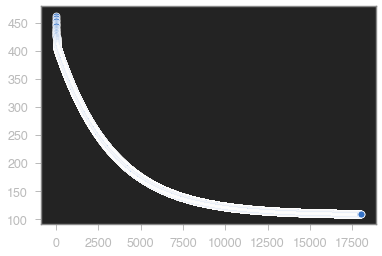

In [6]:
numEpochs= 18000
alpha = 0.0008
theta = np.array([1.9059518,1.534264])
costs = gradientDescent(x, y, theta, alpha, m, numEpochs)

### Google's Version
https://developers.google.com/machine-learning/crash-course/fitter/graph



#### Adaptive Learning Rates

The performance of the model on the training dataset can be monitored by the learning algorithm and the learning rate can be adjusted in response.

This is called an **adaptive learning rate**.

Perhaps the simplest implementation is to make the learning rate smaller once the performance of the model plateaus, such as by decreasing the learning rate by a factor of two or an order of magnitude.

A function that determines the learning rate at each step is called the *learning schedule*.

https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/

# Applying Gradient Descent

 *Gradient Descent* is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

When doing GD it is important to scale your features to a similiar scale or else it will take the algorithm longer to converge. 

<img src='./resources/scalecontour.png' width=500/>

## Batches

In gradient descent, a **batch** is the total number of examples you use to calculate the gradient in a single iteration. So far, we've assumed that the batch has been the entire data set. 

### Batch Gradient Descent

* This formula involves caluclations over the full training set X, at each Gradient Descent step. 
* Terribly slow on large number of observations, but scales well with the number of features.
* When training a Linear Regression model with hundreds of thousands of features Gradient Descent is much faster than using linear algebra and the Normal Equation.


### Stochastic Gradient Descent (SGD)

- Picks a random instance in the training set at every step and computes the gradients based only on that single instance. 

- Algorithm is much faster given it has very little data to manipulate. 

- Can be used as an out-of-core algorithm, since it only needs one data observation at a time

When the cost function is very irregular, SGD has a better chance of of finding the global minimum than BGD.
This could be bad because the algorithm will never settle at a minimum.  
One way to avoid this is by reducing the learning rate (step size) as the algorithm progresses. 



### Mini-batch Gradient Descent

At each step, computing the gradietns is based on a small random set of instaces called *mini-batches*.

Mini-batch GD will be less erratic than SGD because it is training on a multiple data instances. 

Faster than Batch GD.

Harder to escape local minima than SGD.

### Epochs

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
One epoch is when an ENTIRE dataset is passed through the model one time.


#### How many epochs should we have?

Train each model along a sufficient number of epochs to see the training loss become stuck in a minimum. 

Many algorithms allow you to set up a parameter so that whenever you see the loss not improve after a number of epochs, it stops.  

### Iterations

**Iterations** is the number of batches needed to complete one epoch.

Let’s say we have 2000 training examples that we are going to use. We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.

### Question:

Why would you use more than 1 epoch when fitting your model?

### Comparison of Types of Gradient Descent

<img src='./resources/comparegdtypes.png' width=600/>

<img src='./resources/algotable.png' width=600/>

<img src='./resources/albotable2.png' width=600/>

https://github.com/ageron/handson-ml.git

https://developers.google.com/machine-learning/crash-course/reducing-loss/playground-exercise